In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data=pd.read_csv(r"D:\machine_learning\data\titanic_cleaned.csv")
data.shape

(891, 25)

In [3]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
target=data["Survived"]
feature=data.drop("Survived",axis=1)

In [8]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [13]:
#importing train test split to create validation set
from sklearn.model_selection import train_test_split
train_x,valid_x,train_y,valid_y=train_test_split(feature,target,random_state=101,stratify=target,test_size=0.25)


In [14]:
#distribtion in train set
train_y.value_counts(normalize=True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [15]:
#distribution in test set
valid_y.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

In [16]:
#shape of train set
train_x.shape,train_y.shape

((668, 24), (668,))

## Implementing Decision tree

In [17]:
#importing decision tree for classifer problem
from sklearn.tree import DecisionTreeClassifier

#importing decision tree for regression problem
from sklearn.tree import DecisionTreeRegressor

In [19]:
#creating decsion tree instance
dt=DecisionTreeClassifier(random_state=10)

In [20]:
#fitting the data
dt.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [21]:
#checking score the training score
dt.score(train_x,train_y)

0.9880239520958084

In [22]:
#checking score on validation set
dt.score(valid_x,valid_y)

0.7533632286995515

In [23]:
#predicting on validation set
dt.predict(valid_x)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0], dtype=int64)

In [24]:
dt.predict_proba(valid_x)

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.

In [25]:
 y_pred=dt.predict_proba(valid_x)[:,1]

In [28]:
new_y=[]
for i in range(len(y_pred)):
    if y_pred[i]<0.6:
        new_y.append(0)
    else:
        new_y.append(1)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(valid_y,new_y)

0.7533632286995515

## Changing the maximum depth

In [34]:
train_accuracy=[]
validation_accuracy=[]
for depth in range(1,10):
    dt=DecisionTreeClassifier(max_depth=depth,random_state=10)
    dt.fit(train_x,train_y)
    train_accuracy.append(dt.score(train_x,train_y))
    validation_accuracy.append(dt.score(valid_x,valid_y))
    

In [35]:
frame=pd.DataFrame({"max_depth":range(1,10),"train_accuracy":train_accuracy,"validation_accuracy":validation_accuracy})
frame.head()

,max_depth,train_accuracy,validation_accuracy
0,1,0.803892,0.735426
1,2,0.803892,0.735426
2,3,0.830838,0.766816
3,4,0.847305,0.771300
4,5,0.847305,0.771300


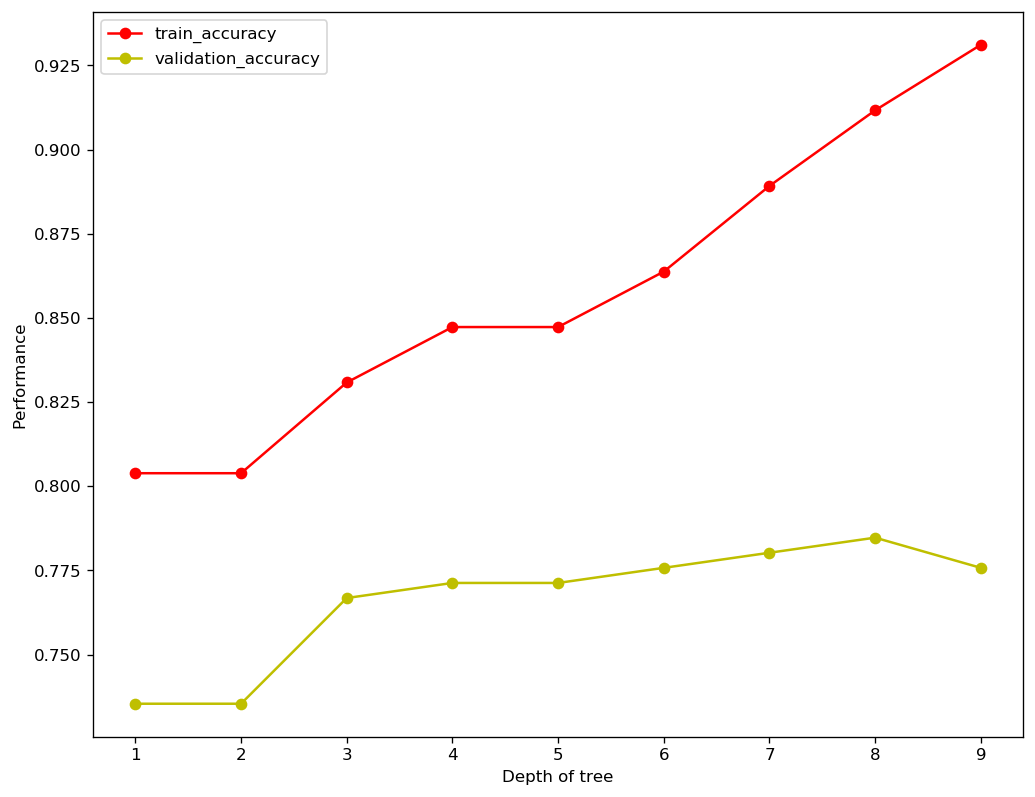

In [41]:
plt.figure(figsize=(10,8),dpi=120)
plt.plot(frame["max_depth"],frame["train_accuracy"],marker="o",color="r")
plt.plot(frame["max_depth"],frame["validation_accuracy"],marker="o",color="y")
plt.xlabel("Depth of tree")
plt.ylabel("Performance")
plt.legend(("train_accuracy","validation_accuracy"))

In [42]:
dt=DecisionTreeClassifier(max_depth=8,max_leaf_nodes=25,random_state=10)

In [43]:
#fitting the data set
dt.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [44]:
#training score calculation
dt.score(train_x,train_y)

0.8802395209580839

In [45]:
#validation score caliculation
dt.score(valid_x,valid_y)

0.8116591928251121